# Would you like some donuts?
Hi there! My name is Tamara and I want to be a part of Think, Make, Start this April. Currently, I'm studying Robotics, Cognition, Intelligence in my second semester. In my free time I like to take on creative (coding) projects, hang out with friends, and help robots take over the world. Wait. Not that, hiking, I like to hike in the alps. <br>
As I scrolled through past projects, I noticed that most of them made use of some sort of data or image processing. With the following lines I would like to demonstrate some of my knowledge in this field and show you why I would be a valuable asset in one of the upcoming projects. <br>
Without any further ado, let's start!

## Data set generator
To keep things simple, I created two classes; mugs and donuts. The images were extracted from the Google Image Search using a Python script and manually postprocessed, i.e. I deleted the irrelevant pictures. <br>
First, the image data is loaded and stored in an array. The whole dataset contains 1122 instances with 565 mugs and 557 donuts. <br>
Note that to speed up the calculations I choose to read the images as greyscales.

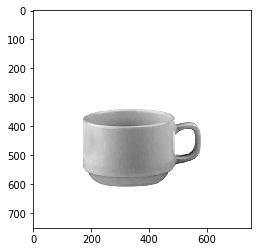

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random

DATADIR = "data"

CATEGORIES = ["mug", "donut"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')    
        plt.show()  

        break  
    break

In [11]:
print('Array values =')
print(img_array)
print('The array has the shape of:',img_array.shape)

Array values =
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
The array has the shape of: (750, 750)


## Pre-processing data
Secondly, I rescaled all images to the uniform IMG_SIZE and shuffled the data set. If the data would remained in its previous state, the train and validation sets might be different or the network might simply learn the datasplit instead of the image features. <br>
The images are stored in a matrix X and the labels in a vector y.

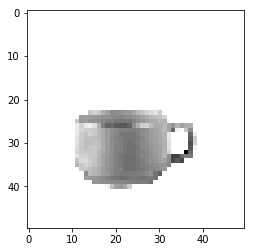

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
full_dataset = []

def create_full_dataset():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # assign classification labels 0=mug 1=donut

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                full_dataset.append([new_array, class_num])
            except Exception as e:  
                pass

create_full_dataset()
random.shuffle(full_dataset)

print('This data set contains', len(full_dataset), 'samples.')

This data set contains 1122 samples.


In [14]:
print('Labels of the last 10 samples:')
for sample in full_dataset[:10]:
    print(sample[1])

Labels of the last 10 samples:
0
1
1
1
1
1
1
1
1
1


In [7]:
X = []
y = []

for features,label in full_dataset:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

## Classifying mugs and donuts with a CNN
This is where the magic happens. <br>
In the next paragraph I defined a model using the Keras API from tensorflow. While it's very straight forward and perfect for fast prototyping, it might not always be the best option for intricate applications. <br>
In this case however, it is more than sufficient.

In [8]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = X/255.0

##########################################################################
#                     DEFINING THE MODEL STRUCTURE                       #
##########################################################################

model = Sequential()

#model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:], padding='valid', kernel_initializer='glorot_uniform', 
                bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='valid', kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # to convert 3D feature maps into a 1D feature vector

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))


##########################################################################
#                         COMPILE AND TRAIN MODEL                        #
##########################################################################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(X, y, batch_size=60, epochs=20, validation_split=0.3)
#print('Final testing accuracy:', training_accuracy)
#print('Final validation accuracy:', validation_accuracy)

Train on 785 samples, validate on 337 samples
Epoch 1/20
785/785 [==============================] - 22s 27ms/step - loss: 2.8728 - acc: 0.5287 - val_loss: 1.8819 - val_acc: 0.5341
Epoch 2/20
785/785 [==============================] - 21s 26ms/step - loss: 1.5744 - acc: 0.6471 - val_loss: 1.3195 - val_acc: 0.6647
Epoch 3/20
785/785 [==============================] - 21s 26ms/step - loss: 1.1773 - acc: 0.7185 - val_loss: 1.0930 - val_acc: 0.7240
Epoch 4/20
785/785 [==============================] - 21s 26ms/step - loss: 1.0019 - acc: 0.7631 - val_loss: 1.0729 - val_acc: 0.6647
Epoch 5/20
785/785 [==============================] - 20s 26ms/step - loss: 0.9016 - acc: 0.7873 - val_loss: 0.8647 - val_acc: 0.7774
Epoch 6/20
785/785 [==============================] - 20s 26ms/step - loss: 0.8157 - acc: 0.7924 - val_loss: 0.8288 - val_acc: 0.7656
Epoch 7/20
785/785 [==============================] - 20s 26ms/step - loss: 0.8038 - acc: 0.7822 - val_loss: 0.9010 - val_acc: 0.7003
Epoch 8/20
785/7

## Evaluate the training
Now it's time to check how the loss progresses over time and how the training and validation accuracies fair against each other.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


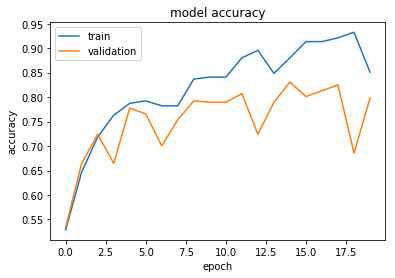

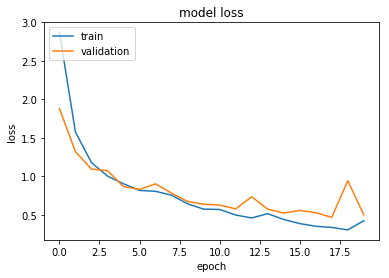

In [9]:
# Plot the loss function and train / validation accuracies
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


## Conclusion
We oserve that while the model loss decreases and the accuracy increases, the  validation graph is still very "noisy". This noise indicates that the model is not very robust, i.e. the data is not conclusive enough or the learned features don't describe the image characteristics too well. <br>
Possible improvemnts could be achieved by training a model ensamble with different hyperparameter settings or including the RGB-colour channel into the image data. <br>
I hope you enjoyed my little demo and we get the chance to meet in person! 